<a href="https://colab.research.google.com/github/hamzaboulibya/Logistique_Regression-project-with-R-/blob/main/Copy_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Chargement des packages nécessaires
library(MASS)

# Chargement des données
data("Pima.tr")

# Affichage des six premières lignes des données
head(Pima.tr)

# Ajustement d'un modèle de régression logistique avec toutes les variables
model <- glm(diabetes ~ ., data = Pima.tr, family = binomial)

# Affichage d'un résumé du modèle initial
summary(model)


,npreg,glu,bp,skin,bmi,ped,age,type
,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<fct>
1,5,86,68,28,30.2,0.364,24,No
2,7,195,70,33,25.1,0.163,55,Yes
3,5,77,82,41,35.8,0.156,35,No
4,0,165,76,43,47.9,0.259,26,No
5,0,107,60,25,26.4,0.133,23,No
6,5,97,76,27,35.6,0.378,52,Yes


ERROR: ignored

In [ ]:

# Utilisation de la méthode backward elimination pour sélectionner les variables les plus pertinentes
model_backward <- step(model, direction = "backward")

# Affichage du modèle final
summary(model_backward)


ERROR: ignored

In [ ]:
# Chargement des packages nécessaires
library(cardiovascular)
library(caret)

# Chargement des données "cardio"
data(cardio)

# Sélection des variables à inclure dans le modèle
vars_to_include <- c("age", "height", "weight", "ap_hi", "ap_lo", "cholesterol", "gluc", "smoke", "alco", "active")

# Création d'une nouvelle dataset ne contenant que les variables sélectionnées et la variable à expliquer
new_data <- cardio[, c(vars_to_include, "cardio")]

# Conversion de la variable à expliquer en facteur
new_data$cardio <- as.factor(new_data$cardio)

# Division de la dataset en jeu d'entraînement et de test
set.seed(123)
trainIndex <- createDataPartition(new_data$cardio, p = 0.8, list = FALSE)
train <- new_data[trainIndex, ]
test <- new_data[-trainIndex, ]

# Ajustement d'un modèle de régression logistique avec toutes les variables
model <- glm(cardio ~ ., data = train, family = binomial)

# Utilisation de la méthode backward elimination pour sélectionner les variables les plus pertinentes
model_backward <- step(model, direction = "backward")

# Affichage du modèle final
summary(model_backward)

# Sélection des variables sélectionnées dans le modèle final
selected_vars <- names(model_backward$coefficients)[-1]

# Création d'une nouvelle dataset ne contenant que les variables sélectionnées
new_data <- new_data[, c(selected_vars, "cardio")]

# Affichage des six premières lignes de la nouvelle dataset
head(new_data)


ERROR: ignored

In [ ]:
# Charger le jeu de données "mtcars"
data(mtcars)

# Afficher les premières lignes du jeu de données
head(mtcars)


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [ ]:
# Ajuster un modèle de régression linéaire avec toutes les variables
model <- lm(mpg ~ ., data = mtcars)

# Afficher un résumé du modèle
summary(model)



Call:
lm(formula = mpg ~ ., data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4506 -1.6044 -0.1196  1.2193  4.6271 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 12.30337   18.71788   0.657   0.5181  
cyl         -0.11144    1.04502  -0.107   0.9161  
disp         0.01334    0.01786   0.747   0.4635  
hp          -0.02148    0.02177  -0.987   0.3350  
drat         0.78711    1.63537   0.481   0.6353  
wt          -3.71530    1.89441  -1.961   0.0633 .
qsec         0.82104    0.73084   1.123   0.2739  
vs           0.31776    2.10451   0.151   0.8814  
am           2.52023    2.05665   1.225   0.2340  
gear         0.65541    1.49326   0.439   0.6652  
carb        -0.19942    0.82875  -0.241   0.8122  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.65 on 21 degrees of freedom
Multiple R-squared:  0.869,	Adjusted R-squared:  0.8066 
F-statistic: 13.93 on 10 and 21 DF,  p-value: 3.793e-07

In [ ]:
# Effectuer le test F
anova(model)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
cyl,1,817.7129524,817.7129524,116.42454564,5.034450e-10
disp,1,37.5939529,37.5939529,5.35256153,3.091083e-02
hp,1,9.3709293,9.3709293,1.33421658,2.610310e-01
drat,1,16.4674349,16.4674349,2.34460470,1.406438e-01
wt,1,77.4757948,77.4757948,11.03086869,3.244492e-03
qsec,1,3.9493082,3.9493082,0.56229561,4.616557e-01
vs,1,0.1297687,0.1297687,0.01847624,8.931733e-01
am,1,14.4742372,14.4742372,2.06081667,1.658577e-01
gear,1,0.9717105,0.9717105,0.13835045,7.136533e-01


In [ ]:
# Utiliser la méthode backward elimination pour sélectionner les variables les plus pertinentes
model_backward <- step(model, direction = "backward")

# Afficher le modèle final
summary(model_backward)


Start:  AIC=70.9
mpg ~ cyl + disp + hp + drat + wt + qsec + vs + am + gear + carb

       Df Sum of Sq    RSS    AIC
- cyl   1    0.0799 147.57 68.915
- vs    1    0.1601 147.66 68.932
- carb  1    0.4067 147.90 68.986
- gear  1    1.3531 148.85 69.190
- drat  1    1.6270 149.12 69.249
- disp  1    3.9167 151.41 69.736
- hp    1    6.8399 154.33 70.348
- qsec  1    8.8641 156.36 70.765
<none>              147.49 70.898
- am    1   10.5467 158.04 71.108
- wt    1   27.0144 174.51 74.280

Step:  AIC=68.92
mpg ~ disp + hp + drat + wt + qsec + vs + am + gear + carb

       Df Sum of Sq    RSS    AIC
- vs    1    0.2685 147.84 66.973
- carb  1    0.5201 148.09 67.028
- gear  1    1.8211 149.40 67.308
- drat  1    1.9826 149.56 67.342
- disp  1    3.9009 151.47 67.750
- hp    1    7.3632 154.94 68.473
<none>              147.57 68.915
- qsec  1   10.0933 157.67 69.032
- am    1   11.8359 159.41 69.384
- wt    1   27.0280 174.60 72.297

Step:  AIC=66.97
mpg ~ disp + hp + drat + wt + qsec + am


Call:
lm(formula = mpg ~ wt + qsec + am, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4811 -1.5555 -0.7257  1.4110  4.6610 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9.6178     6.9596   1.382 0.177915    
wt           -3.9165     0.7112  -5.507 6.95e-06 ***
qsec          1.2259     0.2887   4.247 0.000216 ***
am            2.9358     1.4109   2.081 0.046716 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.459 on 28 degrees of freedom
Multiple R-squared:  0.8497,	Adjusted R-squared:  0.8336 
F-statistic: 52.75 on 3 and 28 DF,  p-value: 1.21e-11


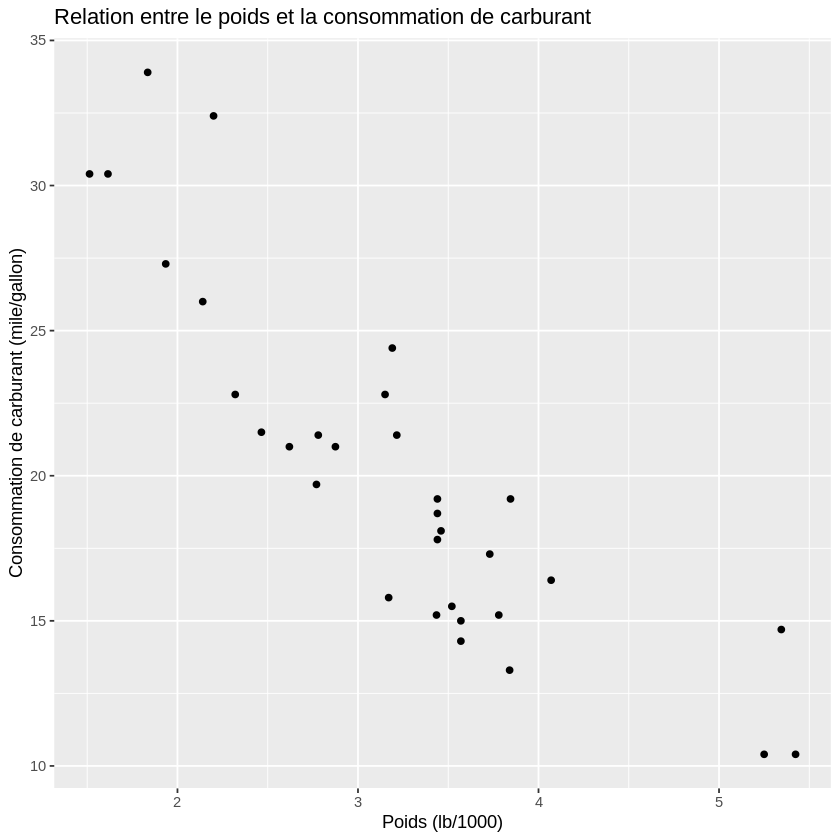

In [ ]:
# Charger la bibliothèque ggplot2
library(ggplot2)

# Charger le jeu de données "mtcars"
data(mtcars)

# Tracer un nuage de points pour visualiser la relation entre le poids et la consommation de carburant
ggplot(mtcars, aes(x = wt, y = mpg)) +
  geom_point() +
  labs(x = "Poids (lb/1000)", y = "Consommation de carburant (mile/gallon)") +
  ggtitle("Relation entre le poids et la consommation de carburant")


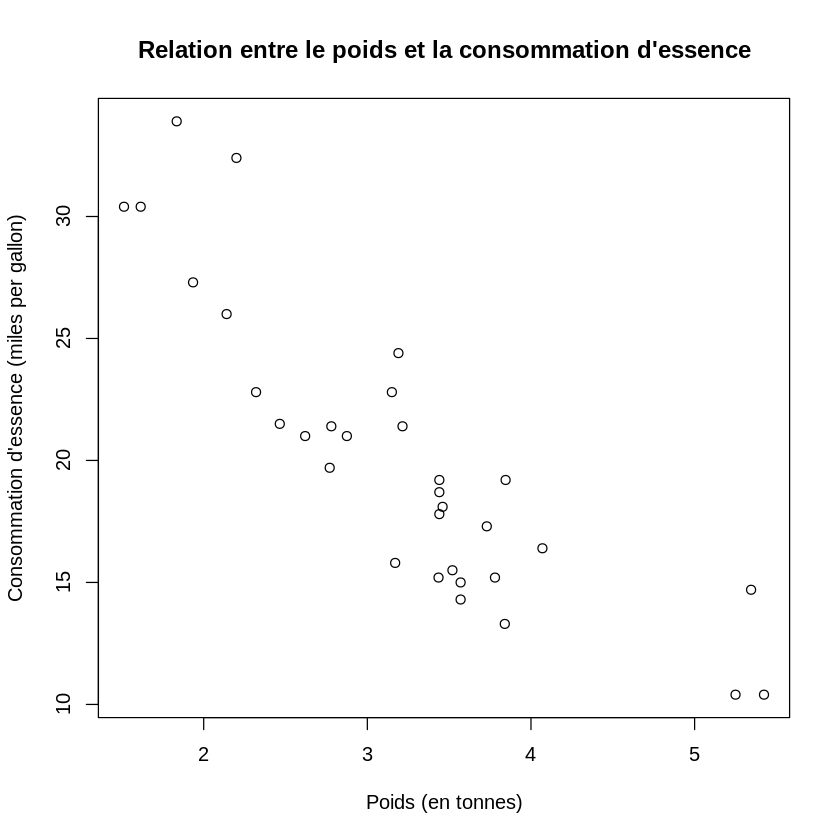

In [ ]:
plot(mtcars$wt, mtcars$mpg, main = "Relation entre le poids et la consommation d'essence",
     xlab = "Poids (en tonnes)", ylab = "Consommation d'essence (miles per gallon)")

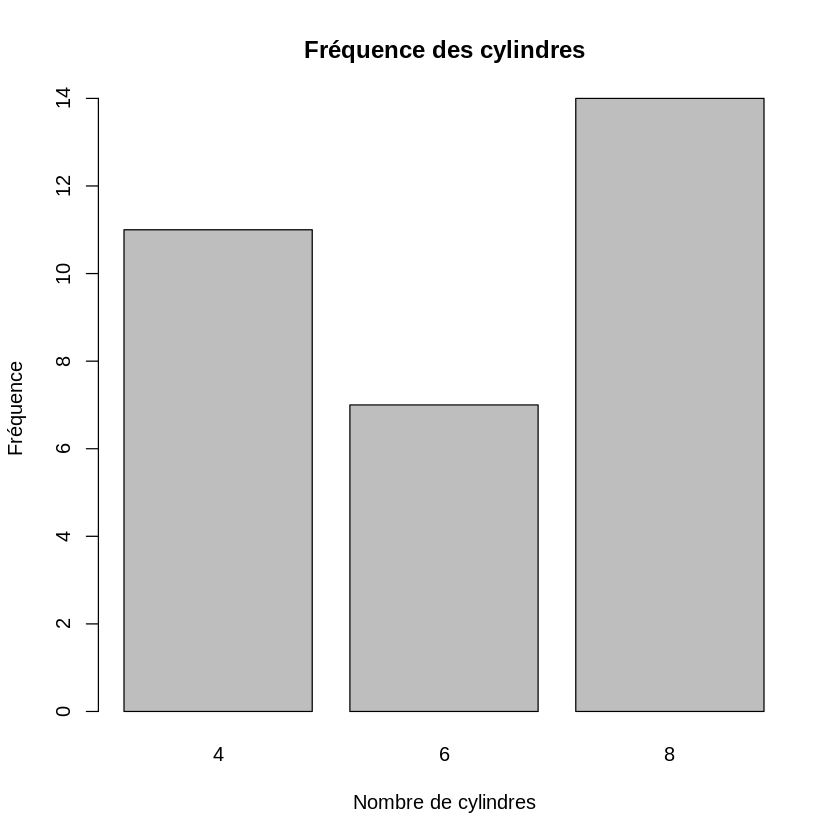

In [ ]:
barplot(table(mtcars$cyl), main = "Fréquence des cylindres",
        xlab = "Nombre de cylindres", ylab = "Fréquence")

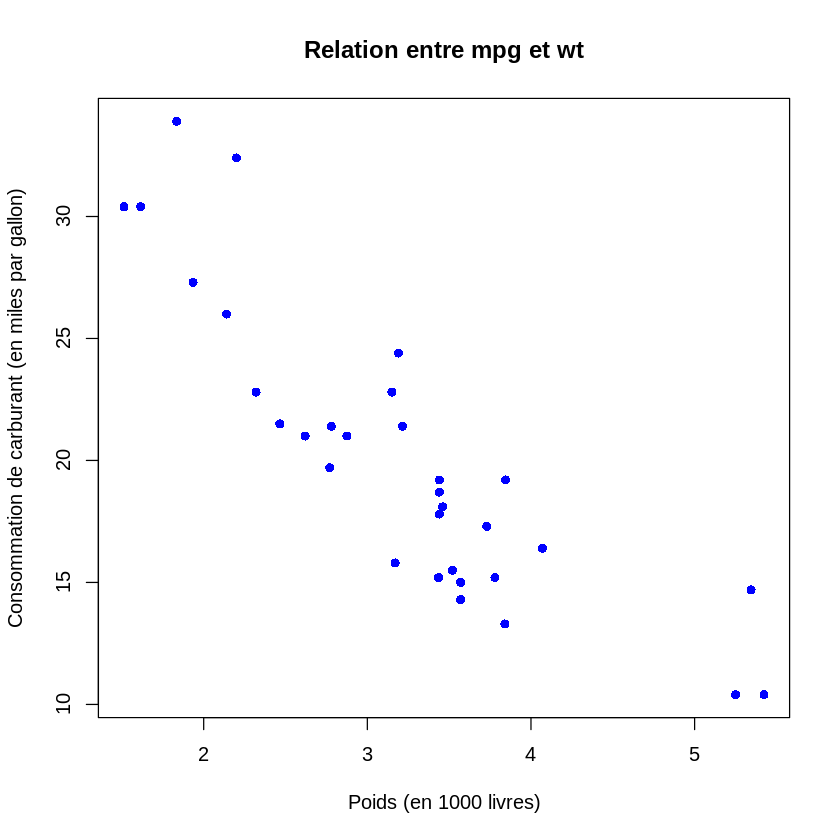

In [ ]:
# Charger le jeu de données "mtcars"
data(mtcars)

# Afficher la relation entre la consommation de carburant (mpg) et le poids (wt) des voitures
plot(mtcars$wt, mtcars$mpg,
     main = "Relation entre mpg et wt",
     xlab = "Poids (en 1000 livres)",
     ylab = "Consommation de carburant (en miles par gallon)",
     pch = 16, col = "blue")


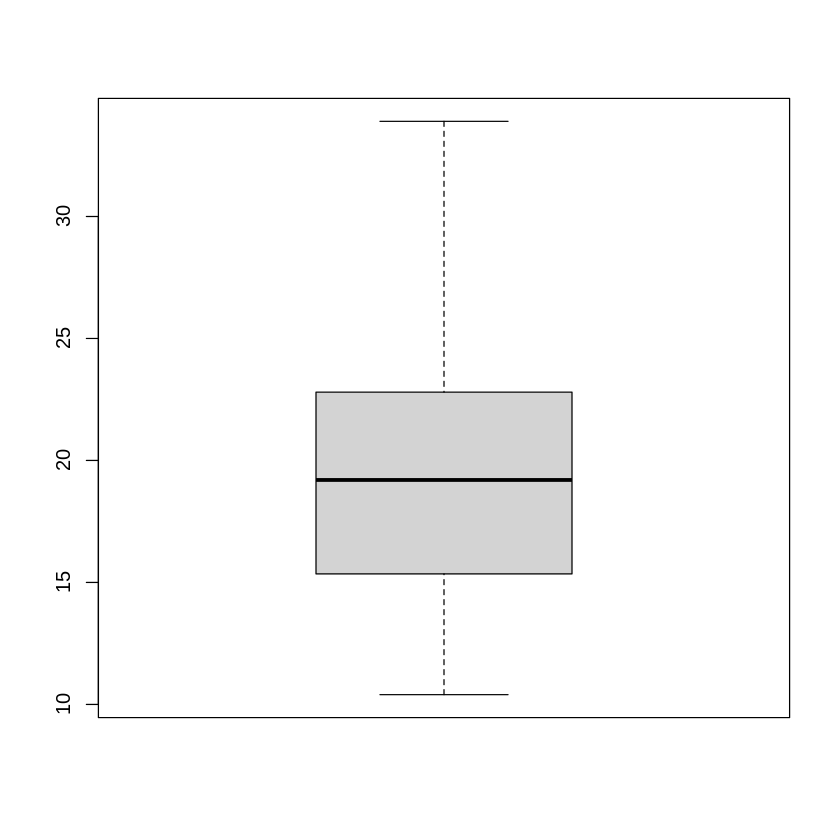

In [ ]:
boxplot(mtcars$mpg)


In [ ]:
# Créer un boxplot pour les variables "mpg" et "cyl"
boxplot(mpg + cyl ~ 1, data = mtcars)


ERROR: ignored

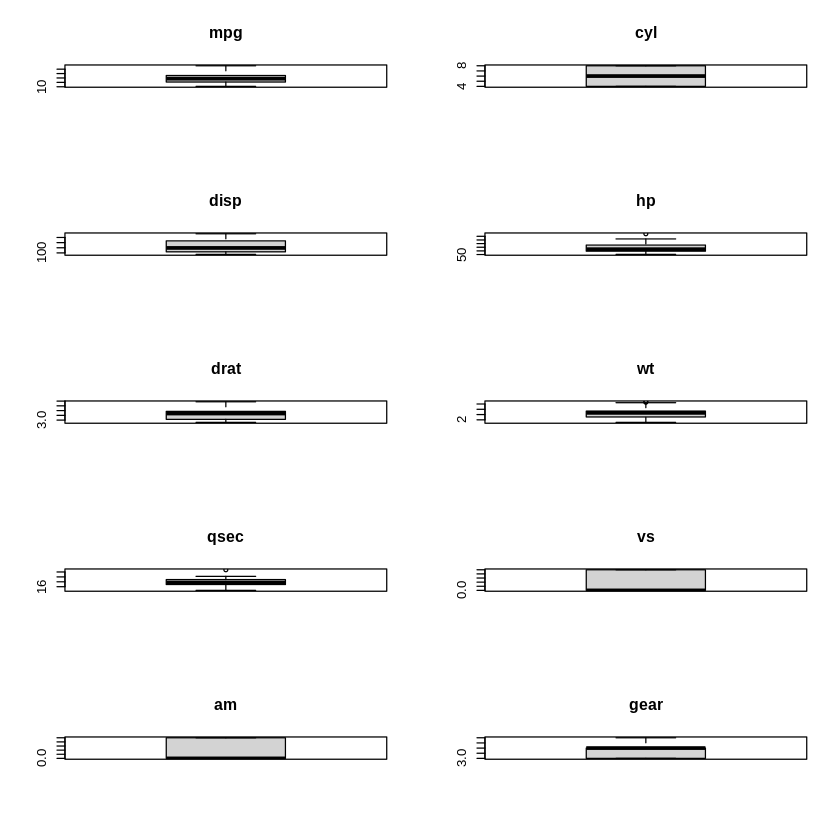

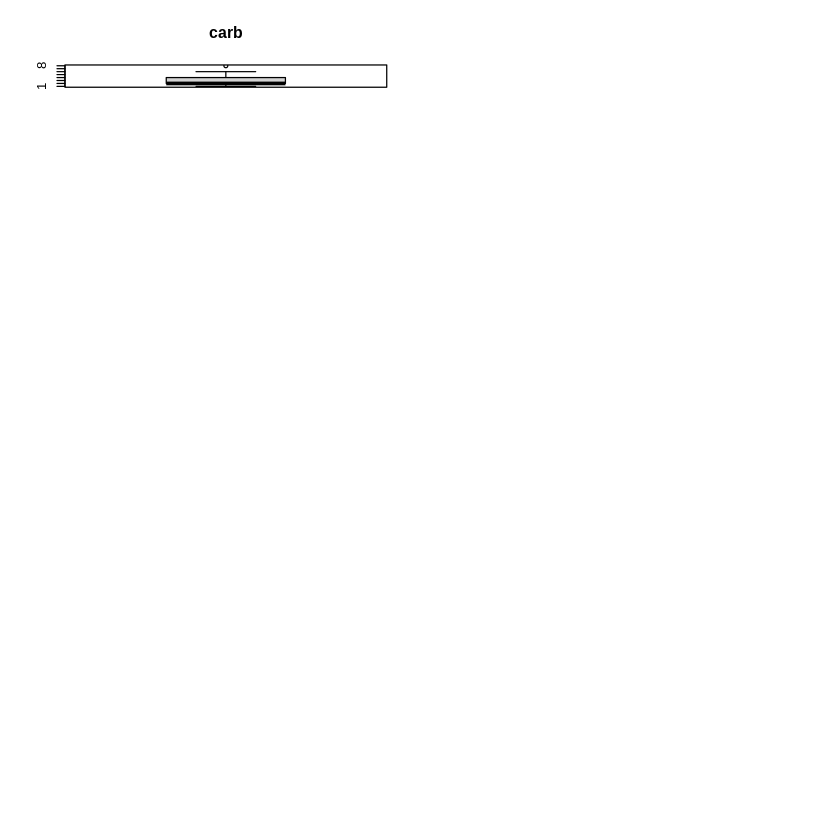

In [ ]:
# Charger le jeu de données "mtcars"
data(mtcars)

# Afficher tous les boxplots
par(mfrow = c(5, 2)) # 5 lignes, 2 colonnes
for(i in 1:ncol(mtcars)){
  boxplot(mtcars[, i], main = colnames(mtcars)[i])
}


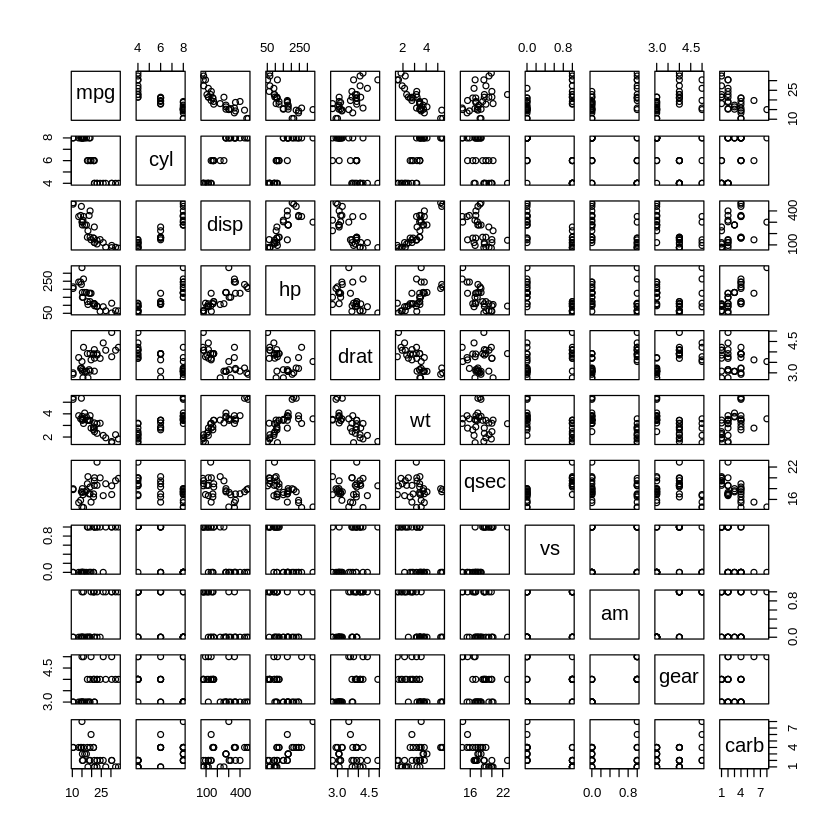

In [ ]:
pairs(mtcars)


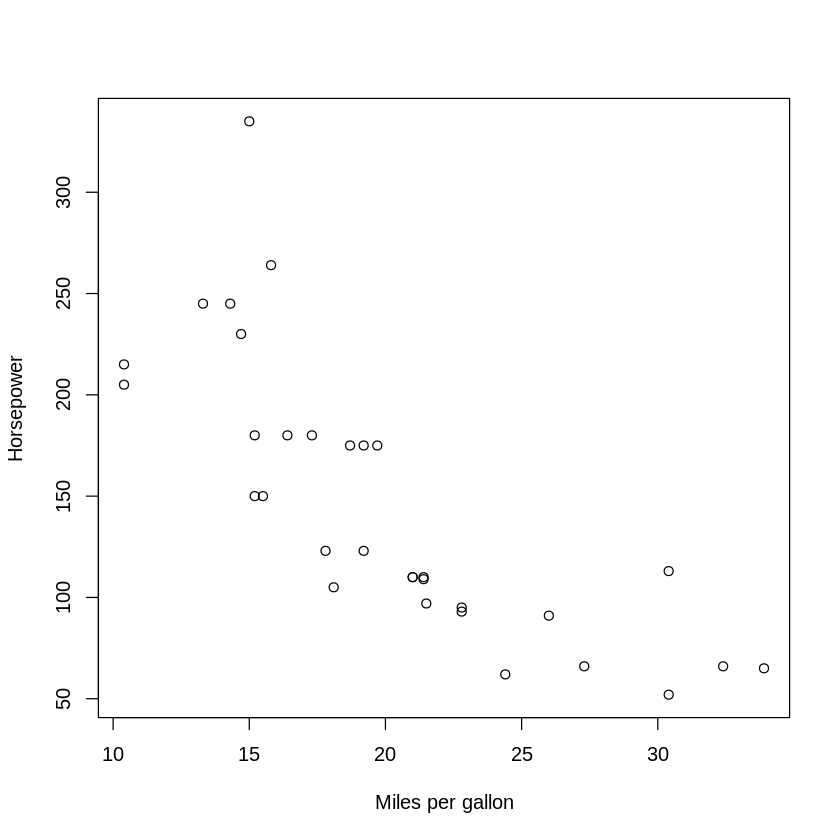

In [ ]:
# Diagramme de dispersion entre les variables "mpg" et "hp"
plot(mtcars$mpg, mtcars$hp, xlab = "Miles per gallon", ylab = "Horsepower")


In [ ]:
# Matrice de corrélation
cor_matrix <- cor(mtcars)

# Affichage de la matrice de corrélation
cor_matrix


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.0000000,-0.8521620,-0.8475514,-0.7761684,0.68117191,-0.8676594,0.41868403,0.6640389,0.59983243,0.4802848,-0.55092507
cyl,-0.8521620,1.0000000,0.9020329,0.8324475,-0.69993811,0.7824958,-0.59124207,-0.8108118,-0.52260705,-0.4926866,0.52698829
disp,-0.8475514,0.9020329,1.0000000,0.7909486,-0.71021393,0.8879799,-0.43369788,-0.7104159,-0.59122704,-0.5555692,0.39497686
hp,-0.7761684,0.8324475,0.7909486,1.0000000,-0.44875912,0.6587479,-0.70822339,-0.7230967,-0.24320426,-0.1257043,0.74981247
drat,0.6811719,-0.6999381,-0.7102139,-0.4487591,1.00000000,-0.7124406,0.09120476,0.4402785,0.71271113,0.6996101,-0.09078980
wt,-0.8676594,0.7824958,0.8879799,0.6587479,-0.71244065,1.0000000,-0.17471588,-0.5549157,-0.69249526,-0.5832870,0.42760594
qsec,0.4186840,-0.5912421,-0.4336979,-0.7082234,0.09120476,-0.1747159,1.00000000,0.7445354,-0.22986086,-0.2126822,-0.65624923
vs,0.6640389,-0.8108118,-0.7104159,-0.7230967,0.44027846,-0.5549157,0.74453544,1.0000000,0.16834512,0.2060233,-0.56960714
am,0.5998324,-0.5226070,-0.5912270,-0.2432043,0.71271113,-0.6924953,-0.22986086,0.1683451,1.00000000,0.7940588,0.05753435
gear,0.4802848,-0.4926866,-0.5555692,-0.1257043,0.69961013,-0.5832870,-0.21268223,0.2060233,0.79405876,1.0000000,0.27407284


In [ ]:
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



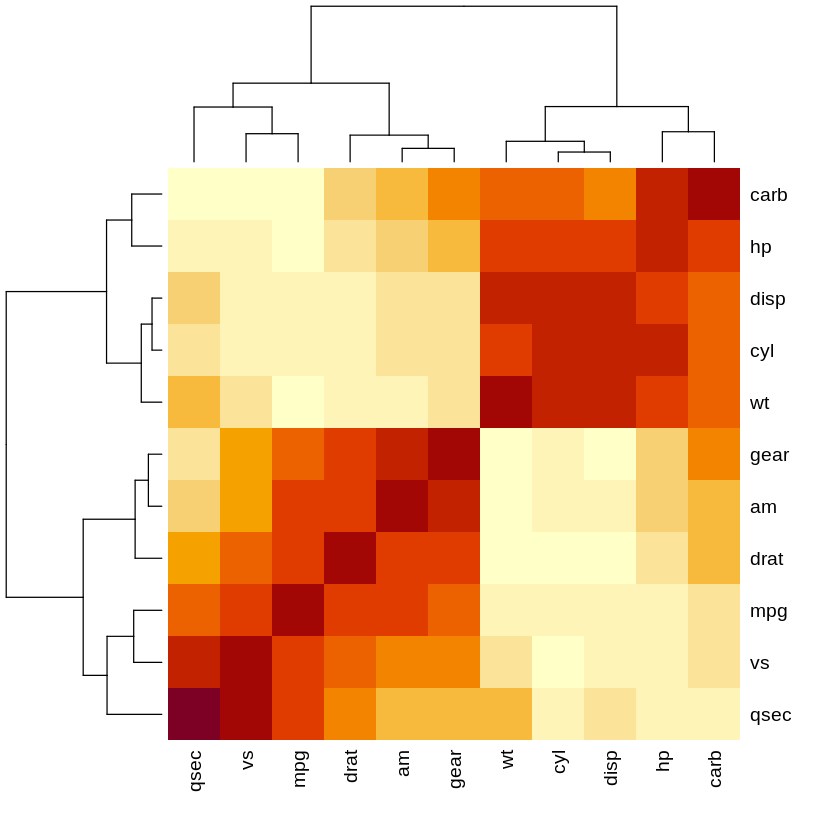

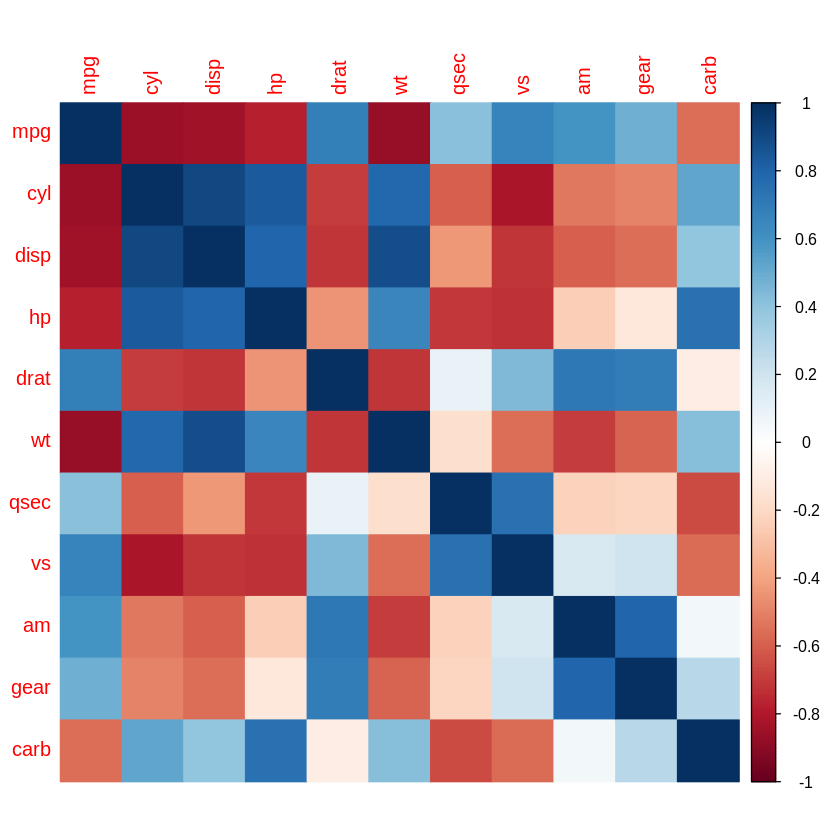

In [ ]:
# Calculer la matrice de corrélation
cor_matrix <- cor(mtcars)

# Afficher la matrice de corrélation avec heatmap()
heatmap(cor_matrix)

# Afficher la matrice de corrélation avec corrplot()
library(corrplot)
corrplot(cor_matrix, method = "color")


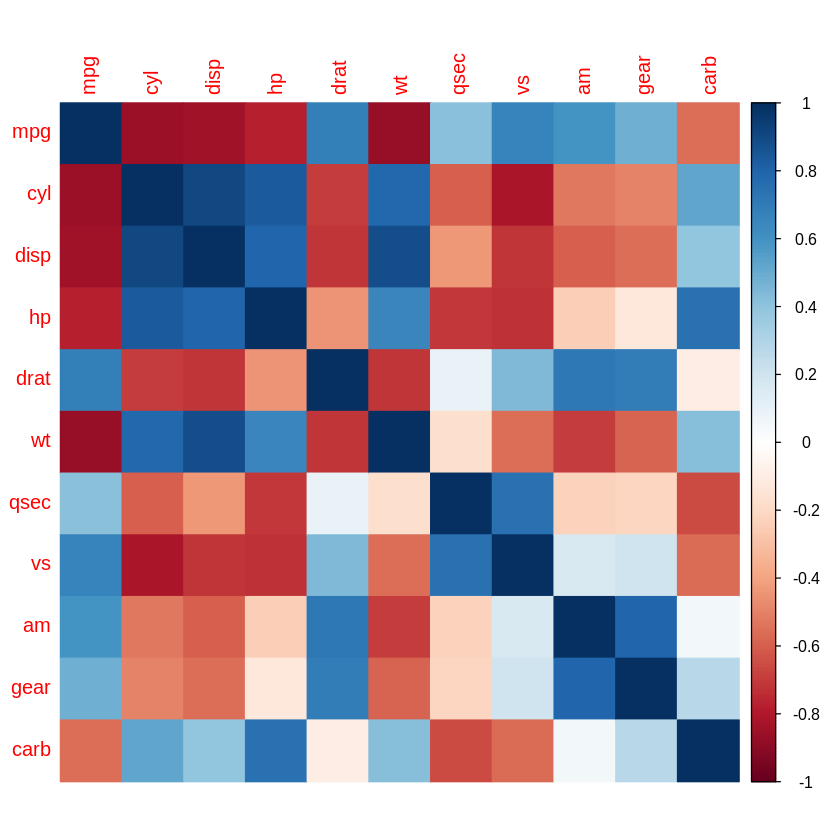

In [ ]:
# Afficher la matrice de corrélation avec corrplot()
library(corrplot)
corrplot(cor_matrix, method = "color")

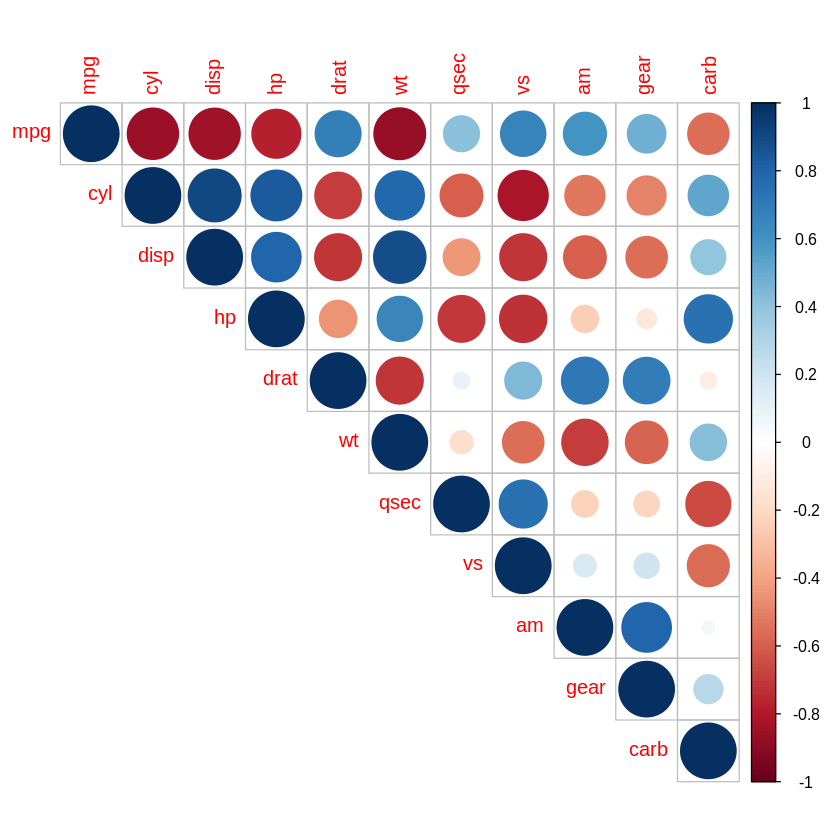

In [ ]:
library(corrplot)
corrplot(cor_matrix, type = "upper", method = "circle")


In [ ]:
# Afficher un heatmap de la matrice de corrélation
library(ggplot2)
ggplot2::ggplot(data = melt(corr_matrix), aes(x=Var1, y=Var2, fill=value)) +
  ggplot2::geom_tile() +
  ggplot2::scale_fill_gradient2(low="blue", high="red", mid="white",
                                midpoint=0, limit=c(-1,1), space="Lab",
                                name="Pearson\nCorrelation") +
  ggplot2::theme_minimal() +
  ggplot2::coord_fixed() +
  ggplot2::theme(axis.text.x = element_text(angle = 90, vjust = 0.5,
                                            hjust=1)) +
  ggplot2::ggtitle("Heatmap of Correlation Matrix")

ERROR: ignored

In [ ]:
library(ggplot2)
ggplot2::ggpairs(mtcars, columns = 1:6, title = "Pairplot of mtcars dataset")

ERROR: ignored

In [ ]:
library(corrplot)
corrplot(mpg_correlations, method = "circle", type = "lower", tl.col = "black", tl.srt = 45)

ERROR: ignored

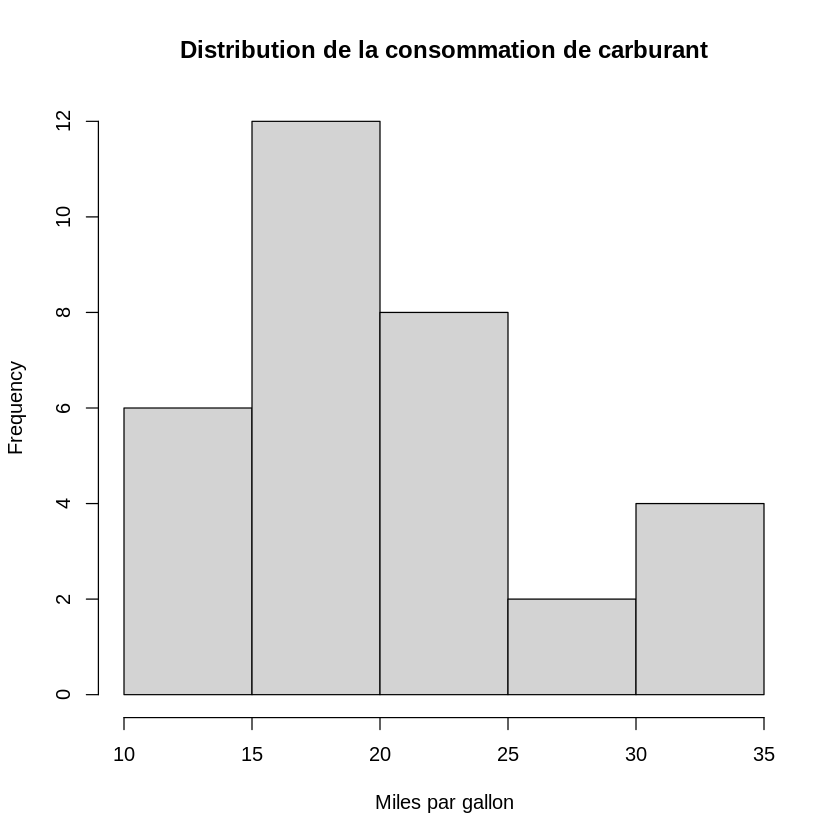

In [ ]:
# Créer un histogramme de la consommation de carburant
hist(mtcars$mpg, main = "Distribution de la consommation de carburant", xlab = "Miles par gallon")


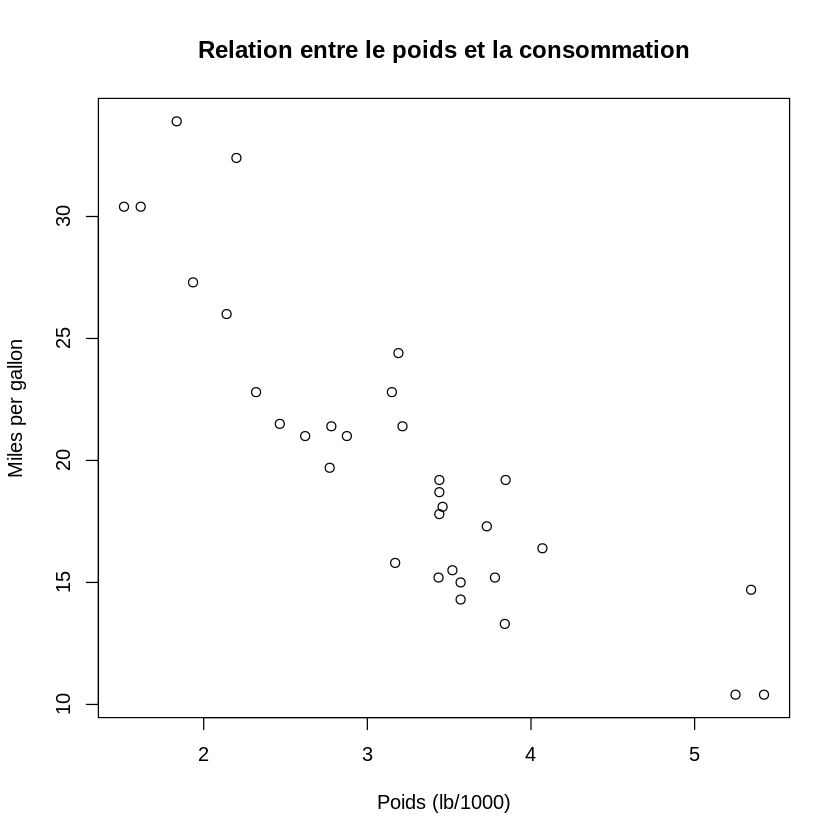

In [ ]:
plot(mtcars$wt, mtcars$mpg, xlab = "Poids (lb/1000)", ylab = "Miles per gallon", main = "Relation entre le poids et la consommation")


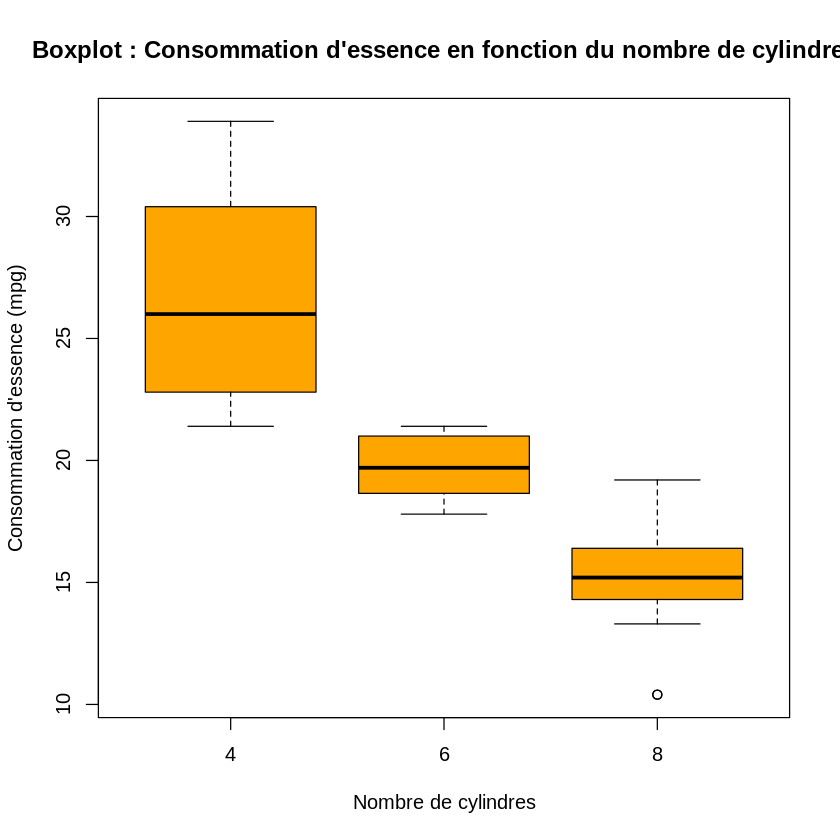

In [ ]:
# Boxplot de la consommation d'essence en fonction du nombre de cylindres (cyl)
boxplot(mtcars$mpg ~ mtcars$cyl, main="Boxplot : Consommation d'essence en fonction du nombre de cylindres",
        xlab="Nombre de cylindres", ylab="Consommation d'essence (mpg)", col="orange")


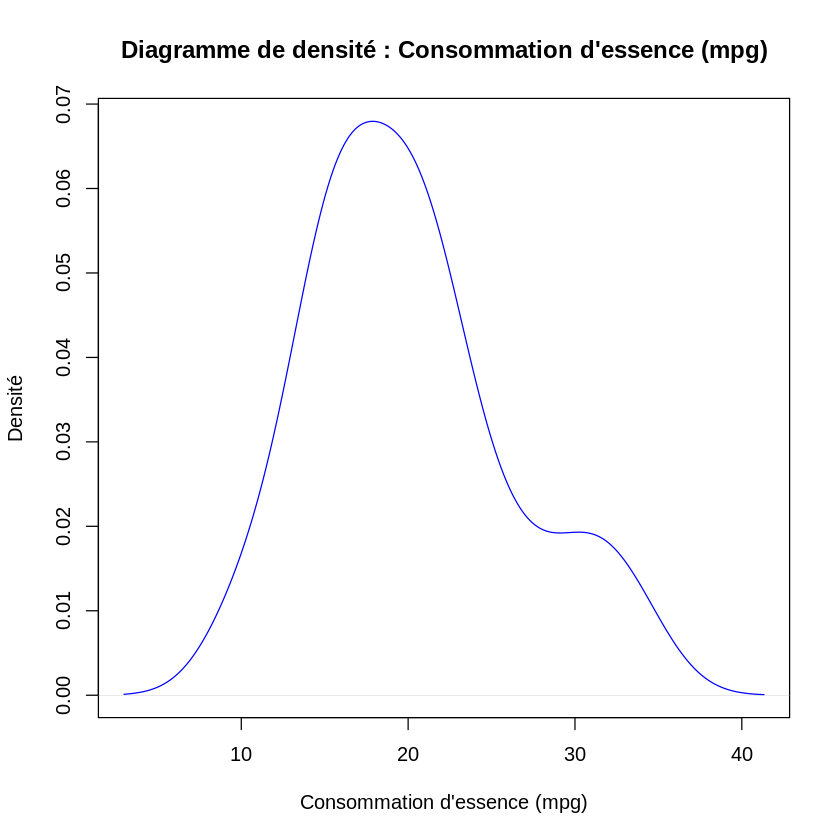

In [ ]:
# Diagramme de densité de la consommation d'essence (mpg)
plot(density(mtcars$mpg), main="Diagramme de densité : Consommation d'essence (mpg)",
     xlab="Consommation d'essence (mpg)", ylab="Densité", col="blue")


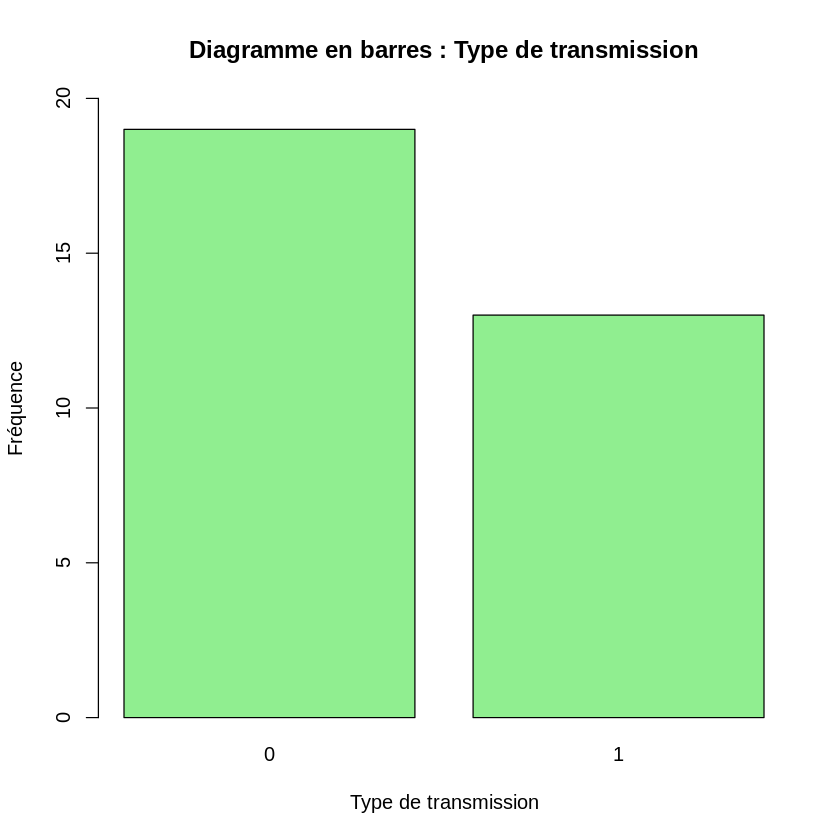

In [ ]:
# Diagramme en barres du type de transmission (am)
barplot(table(mtcars$am), main="Diagramme en barres : Type de transmission",
        xlab="Type de transmission", ylab="Fréquence", col="lightgreen", ylim=c(0,20))


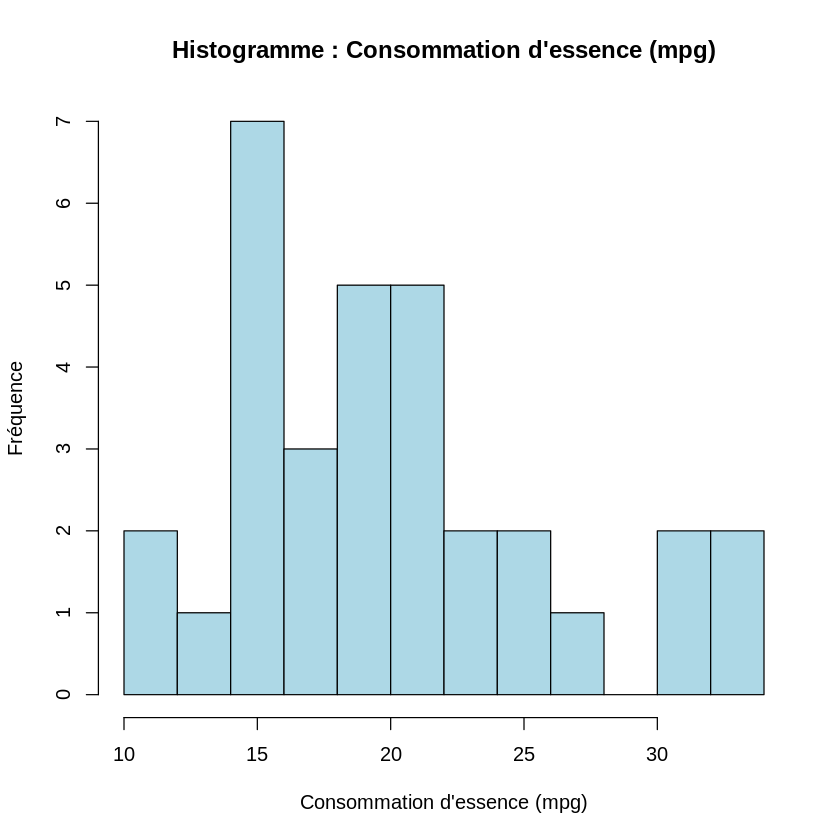

In [ ]:
# Histogramme de la consommation d'essence (mpg)
hist(mtcars$mpg, breaks=10, main="Histogramme : Consommation d'essence (mpg)",
     xlab="Consommation d'essence (mpg)", ylab="Fréquence", col="lightblue")


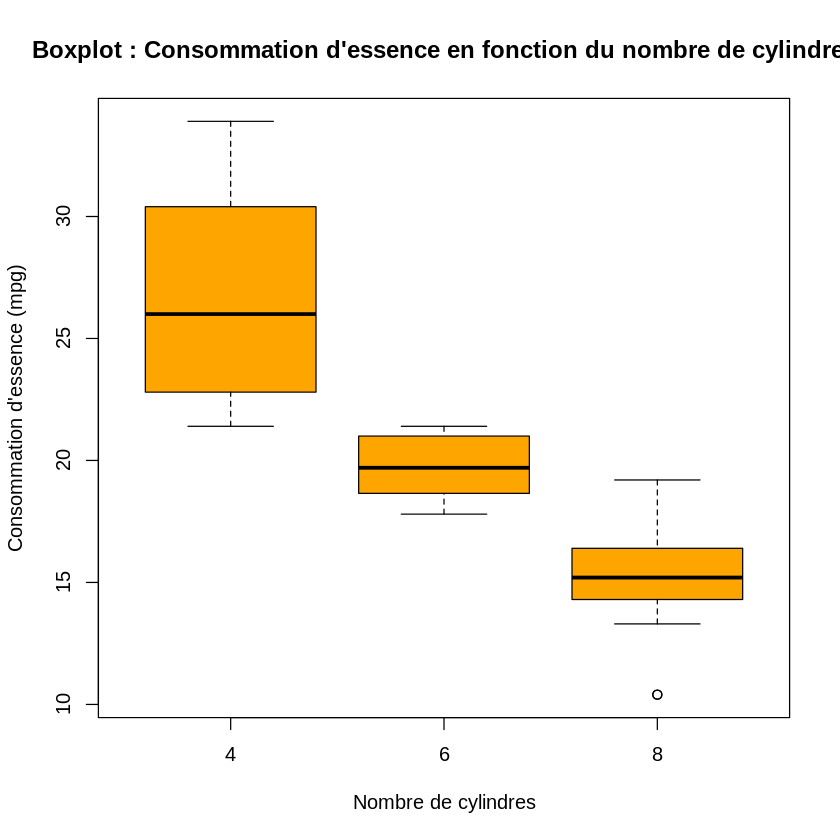

In [ ]:
# Boxplot de la consommation d'essence en fonction du nombre de cylindres (cyl)
boxplot(mtcars$mpg ~ mtcars$cyl, main="Boxplot : Consommation d'essence en fonction du nombre de cylindres",
        xlab="Nombre de cylindres", ylab="Consommation d'essence (mpg)", col="orange")


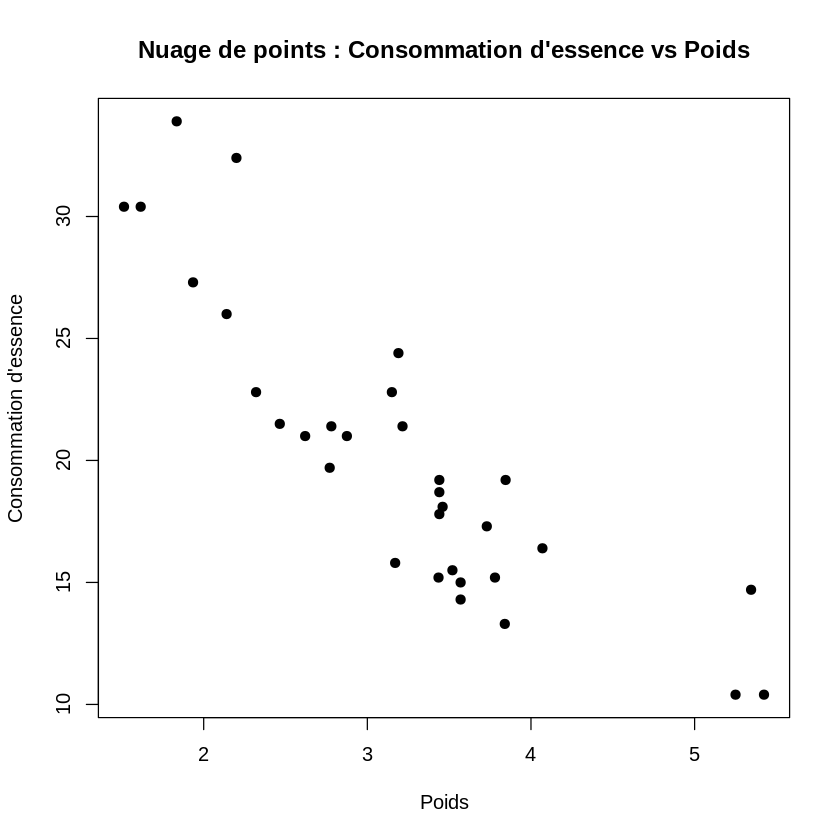

In [ ]:
# Nuage de points entre la consommation d'essence (mpg) et le poids (wt)
plot(mtcars$wt, mtcars$mpg, main="Nuage de points : Consommation d'essence vs Poids",
     xlab="Poids", ylab="Consommation d'essence", pch=19)


autress data set **bold text**

In [ ]:
library(tidyverse)

# Importer les données
diabetes <- read.csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv", header = FALSE)
colnames(diabetes) <- c("Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome")

# Afficher la matrice de corrélation
cor_matrix<-cor(diabetes)
cor_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.00000000,0.12945867,0.14128198,-0.08167177,-0.07353461,0.01768309,-0.03352267,0.54434123,0.22189815
Glucose,0.12945867,1.00000000,0.15258959,0.05732789,0.33135711,0.22107107,0.13733730,0.26351432,0.46658140
BloodPressure,0.14128198,0.15258959,1.00000000,0.20737054,0.08893338,0.28180529,0.04126495,0.23952795,0.06506836
SkinThickness,-0.08167177,0.05732789,0.20737054,1.00000000,0.43678257,0.39257320,0.18392757,-0.11397026,0.07475223
Insulin,-0.07353461,0.33135711,0.08893338,0.43678257,1.00000000,0.19785906,0.18507093,-0.04216295,0.13054795
BMI,0.01768309,0.22107107,0.28180529,0.39257320,0.19785906,1.00000000,0.14064695,0.03624187,0.29269466
DiabetesPedigreeFunction,-0.03352267,0.13733730,0.04126495,0.18392757,0.18507093,0.14064695,1.00000000,0.03356131,0.17384407
Age,0.54434123,0.26351432,0.23952795,-0.11397026,-0.04216295,0.03624187,0.03356131,1.00000000,0.23835598
Outcome,0.22189815,0.46658140,0.06506836,0.07475223,0.13054795,0.29269466,0.17384407,0.23835598,1.00000000


In [ ]:
head(diabetes)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,0,0,25.6,0.201,30,0


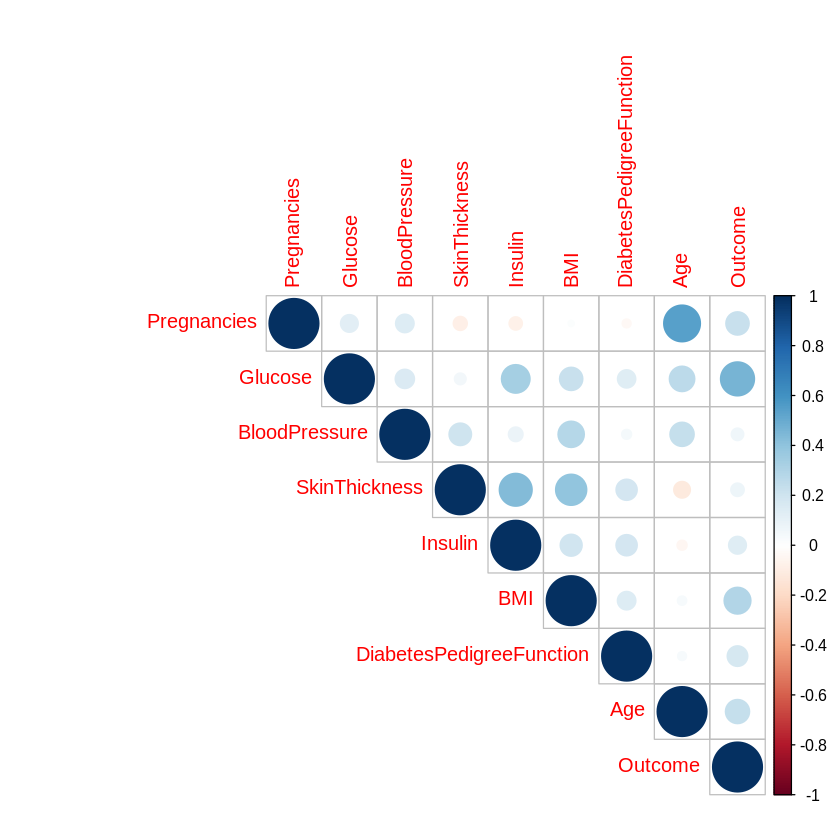

In [ ]:

corrplot(cor_matrix, type = "upper", method = "circle")

In [ ]:
library(corrplot)

# # Charger les données
# diabetes <- read.csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv", header = FALSE)
# colnames(diabetes) <- c("Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome")

# Calculer la matrice de corrélation
corr_mat <- cor(diabetes)

# Sélectionner les variables ayant une corrélation absolue supérieure à 0.5 avec "Outcome"
vars_selected <- names(which(abs(corr_mat["Outcome", ]) > 0.2))
print(vars_selected)


[1] "Pregnancies" "Glucose"     "BMI"         "Age"         "Outcome"    
